In [1]:
# COLAB에서만 동작하는 코드
%tensorflow_version 1.x

UsageError: Line magic function `%tensorflow_version` not found.


# 텍스트 분류

copied and modified from https://www.tensorflow.org/tutorials/keras/text_classification

In [2]:
## 설정
VOCA_SIZE = 4000 # 어휘 사전의 크기
EMBEDDING_SIZE = 64 # 단어를 임베딩한 벡터 크기

## 데이터 로딩

In [3]:
import tensorflow as tf

print('Loading data...')
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.imdb.load_data(num_words=VOCA_SIZE)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



Loading data...
17465344/17464789 [==============================] - 0s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\JuNoe\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


(25000,)
(25000,)
(25000,)
(25000,)


C:\Users\JuNoe\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


## 데이터 보기

In [7]:
print(train_x[0])
print(train_y[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


In [9]:
len(train_x[0])

218

In [10]:
len(train_x[1])

189

In [ ]:
print(train_x[:5])
print(train_y[:5])

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 2, 2, 134, 26, 4, 715, 8, 118,

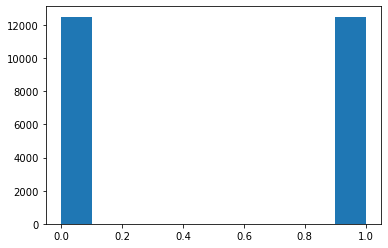

In [8]:
import matplotlib.pyplot as plt

plt.hist(train_y)
plt.show()

## 텍스트로 데이터 보기

In [11]:
# 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = tf.keras.datasets.imdb.get_word_index()
# word_index = {'fawn': 34701, 'tsukino': 52006, 'nunnery': 52007, ... }

# 처음 몇 개 인덱스는 사전에 정의되어 있습니다
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# reverse_word_index = {34704: 'fawn', 52009: 'tsukino', 52010: 'nunnery', ... }

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(train_x[0])
print(decode_review(train_x[0]))

1646592/1641221 [==============================] - 0s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
<START> this film was ju

## 각 데이터의 길이

In [12]:
print(len(train_x[0]))
print(len(train_x[1]))
print(len(train_x[2]))
print(len(train_x[3]))
print(len(train_x[4]))

218
189
141
550
147


## 데이터 길이 일정하게 하기

In [13]:
print(train_x[0])
print(len(train_x[0]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
218


In [14]:
from tensorflow.keras.preprocessing import sequence

train_x = sequence.pad_sequences(train_x, maxlen=400, padding='post')
test_x = sequence.pad_sequences(test_x, maxlen=400, padding='post')
print(train_x.shape)
print(test_x.shape)

(25000, 400)
(25000, 400)


In [15]:
print(train_x[0])
print(len(train_x[0]))

[   1   14   22   16   43  530  973 1622 1385   65  458    2   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172    2 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920    2  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
    2   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117    2   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194    2   18    4  226   22   21  134  476
   26  480    5  144   30    2   18   51   36   28  224   92   25  104
    4 

## CNN 모델 사용

In [16]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

model = Sequential()
model.add(Input(400))
model.add(Embedding(VOCA_SIZE, EMBEDDING_SIZE)) # 텍스트는 임베딩 해서 사용한다.
model.add(Dropout(0.2))
model.add(Conv1D(250, 3))
model.add(GlobalMaxPooling1D())
model.add(Dense(250))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_x, train_y, batch_size=32, epochs=10, validation_data=(test_x, test_y))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 64)           256000    
_________________________________________________________________
dropout (Dropout)            (None, 400, 64)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 398, 250)          48250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250)               0

In [17]:
loss, acc = model.evaluate(test_x, test_y)
print("loss =", loss)
print("acc =", acc)

782/782 [==============================] - 3s 4ms/step - loss: 0.4726 - accuracy: 0.8878
loss = 0.4725516438484192
acc = 0.8877999782562256


## RNN 모델 사용


In [23]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM

model = Sequential()
model.add(Input(400))
model.add(Embedding(VOCA_SIZE, EMBEDDING_SIZE)) # 자연어처리 위해 넣은 코드
model.add(Dropout(0.2))
# model.add(Conv1D(250, 3))
# model.add(GlobalMaxPooling1D())
# model.add(Bidirectional(CuDNNLSTM(64))) # COLAB RNN 코드
model.add(Bidirectional(LSTM(64))) # 윈도우 RNN 코드 CuDNNLSTM은 내장되있음
model.add(Dense(250))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_x, train_y, batch_size=32, epochs=10, validation_data=(test_x, test_y))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 400, 64)           256000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 400, 64)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 250)               32250     
_________________________________________________________________
dropout_6 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [24]:
loss, acc = model.evaluate(test_x, test_y)
print("loss =", loss)
print("acc =", acc)

782/782 [==============================] - 9s 12ms/step - loss: 0.3633 - accuracy: 0.8779
loss = 0.3632696866989136
acc = 0.8779199719429016


# Word2Vec 사용

새로 Embedding을 학습하지 않고 이미 학습된 Word2Vec을 사용.

In [ ]:
!pip install gensim

아래 코드로 로딩이 가능한데, 데이터가 엄청 크다.

In [ ]:
# import gensim.downloader as api
# word2vec = api.load('word2vec-google-news-300')

대신 슬림한 것을 사용한다.

In [ ]:
!wget https://github.com/eyaler/word2vec-slim/raw/master/GoogleNews-vectors-negative300-SLIM.bin.gz

--2020-11-28 06:00:54--  https://github.com/eyaler/word2vec-slim/raw/master/GoogleNews-vectors-negative300-SLIM.bin.gz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/eyaler/word2vec-slim/master/GoogleNews-vectors-negative300-SLIM.bin.gz [following]
--2020-11-28 06:00:54--  https://media.githubusercontent.com/media/eyaler/word2vec-slim/master/GoogleNews-vectors-negative300-SLIM.bin.gz
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276467217 (264M) [application/octet-stream]
Saving to: ‘GoogleNews-vectors-negative300-SLIM.bin.gz’

GoogleNews-vectors- 100%[===================>] 263.66M

In [ ]:
!gzip -d GoogleNews-vectors-negative300-SLIM.bin.gz

In [26]:
from gensim.models import KeyedVectors

word2vec = KeyedVectors.load_word2vec_format("data/GoogleNews-vectors-negative300-SLIM.bin", binary=True)


In [27]:
print(word2vec['tiger'])

[-1.95743926e-02  5.22915944e-02 -5.08934222e-02  4.75378111e-02
  4.19451296e-02  7.27048889e-03  1.43312523e-02 -1.00668306e-02
  7.27048889e-02  6.37915509e-04 -9.33934498e-05 -5.87231815e-02
 -8.55680630e-02 -1.06260993e-01 -1.27513185e-01 -5.95620833e-02
 -5.42490333e-02 -1.63848163e-04 -7.01881796e-02 -5.98417185e-02
  7.21456185e-02 -1.06820263e-01  5.48083000e-02 -5.94222639e-03
 -8.50087926e-02  3.55135426e-02 -1.31987333e-01  4.08265926e-02
  2.04692230e-01  3.39755528e-02 -4.22247648e-02 -3.29968333e-02
 -2.58661620e-02 -2.43281741e-02 -9.00422111e-02  4.41822037e-02
 -5.64861074e-02  8.27717185e-02  9.33978185e-02  7.99753815e-02
 -6.11699792e-03 -2.22309176e-02  3.71913463e-02  5.14526926e-02
  8.16531852e-02 -7.01881796e-02 -2.06929296e-02 -3.10393963e-02
  1.13531485e-01  7.88568407e-02 -8.44495296e-02  8.22124556e-02
 -2.67400197e-03 -6.15195222e-02  2.96412241e-02 -3.80302519e-02
  5.45286685e-02 -7.27048889e-02  1.09616600e-01  1.02765569e-02
  2.88023222e-02  2.99208

In [29]:
len(word2vec['tiger'])

300

In [28]:
word2vec.most_similar('tiger')

[('tigers', 0.8028031587600708),
 ('elephant', 0.6681443452835083),
 ('rhino', 0.6406095027923584),
 ('elephants', 0.6400991678237915),
 ('panther', 0.6312947273254395),
 ('leopard', 0.6132040619850159),
 ('tigress', 0.5982028245925903),
 ('cheetah', 0.5816307663917542),
 ('lions', 0.5742772817611694),
 ('gorilla', 0.5742713212966919)]

In [38]:
word_set = set()

for i in range(len(train_x)):
  words = decode_review(train_x[i]).split(" ")
  word_set.update(words)

for i in range(len(test_x)):
  words = decode_review(test_x[i]).split(" ")
  word_set.update(words)

print(len(word_set))

3999


In [39]:
EMBEDDING_SIZE = len(word2vec['tiger'])

In [40]:
import numpy as np

VOCA_SIZE = 4000 # 어휘 사전의 크기
EMBEDDING_SIZE = len(word2vec['tiger'])
# EMBEDDING_SIZE = 300 # 단어를 임베딩한 벡터 크기

embedding_matrix = np.zeros((VOCA_SIZE, EMBEDDING_SIZE))

# tokenizer에 있는 단어 사전을 순회하면서 word2vec의 300차원 vector를 가져옵니다
for idx, word in enumerate(word_set):
    embedding_vector = word2vec[word] if word in word2vec else None
    if embedding_vector is not None:
        embedding_matrix[idx] = embedding_vector
        
print(embedding_matrix.shape)


(4000, 300)


In [ ]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM

model = Sequential()
model.add(Input(400))
# model.add(Embedding(VOCA_SIZE, EMBEDDING_SIZE))
model.add(Embedding(VOCA_SIZE, 
                    EMBEDDING_SIZE, 
                    input_length=400, 
                    weights=[embedding_matrix],
                    trainable=False
                   )
         )
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(250))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_x, train_y, batch_size=32, epochs=10, validation_data=(test_x, test_y))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 400, 300)          1200000   
_________________________________________________________________
dropout_11 (Dropout)         (None, 400, 300)          0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               186880    
_________________________________________________________________
dense_8 (Dense)              (None, 250)               32250     
_________________________________________________________________
dropout_12 (Dropout)         (None, 250)               0         
_________________________________________________________________
activation_8 (Activation)    (None, 250)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [37]:
loss, acc = model.evaluate(test_x, test_y)
print("loss =", loss)
print("acc =", acc)

782/782 [==============================] - 13s 17ms/step - loss: 0.5450 - accuracy: 0.7220
loss = 0.5449949502944946
acc = 0.7220399975776672
